#### Analysis of President - Candidate height ratio and vote popularity
Estimation of the model,
$$v_i = \alpha + \beta h_i + u_i,$$
where $v_i = $ vote percentage of winner, and $h_i$ = height ratio of the two presidential candidates.

In [4]:
using CSV, DataFrames, Plots, StatsPlots
d = CSV.read("Presidents.csv",header=true)
names(d)

3-element Array{Symbol,1}:
 :n          
 :HeightRatio
 :PopularVote

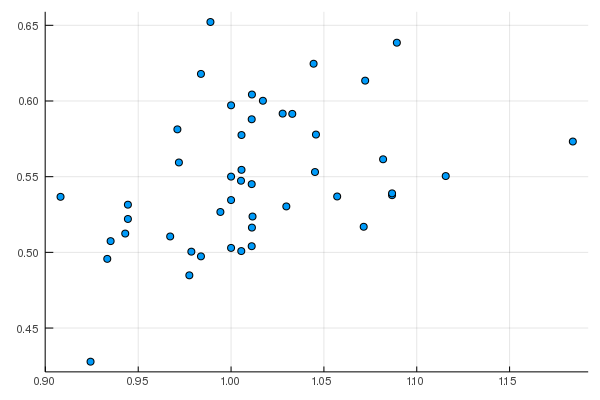

In [6]:
h = d.HeightRatio
v = d.PopularVote
plot(h,v, st=:scatter, label="")

In [38]:
@show(v)
d55 = d[d.PopularVote .> .55, :]

v = [0.427781, 0.56149, 0.597142, 0.581254, 0.530344, 0.507426, 0.526679, 0.536691, 0.577826, 0.573225, 0.55041, 0.55938, 0.484824, 0.500466, 0.502934, 0.495696, 0.516904, 0.522051, 0.531494, 0.600149, 0.54508, 0.604275, 0.516359, 0.63851, 0.652184, 0.58792, 0.59149, 0.624615, 0.55004, 0.537772, 0.523674, 0.554517, 0.577512, 0.500856, 0.613445, 0.504063, 0.617884, 0.510499, 0.553073, 0.591664, 0.538982, 0.534551, 0.547304, 0.497351, 0.512424, 0.536915]


,n,HeightRatio,PopularVote,v,h
,Int64,Float64,Float64,Float64,Float64
1,2,1.08187,0.56149,0.56149,1.08187
2,3,1.0,0.597142,0.597142,1.0
3,4,0.971098,0.581254,0.581254,0.971098
4,9,1.04571,0.577826,0.577826,1.04571
5,10,1.18405,0.573225,0.573225,1.18405
6,11,1.11561,0.55041,0.55041,1.11561
7,12,0.97191,0.55938,0.55938,0.97191
8,20,1.01714,0.600149,0.600149,1.01714
9,22,1.01124,0.604275,0.604275,1.01124


In [39]:
@show(mean(d.PopularVote), mean(d55.PopularVote));

mean(d.PopularVote) = 0.5488505781739133
mean(d55.PopularVote) = 0.5884764226190475


In [19]:
using GLM

# add variables back to data frame
d2 = DataFrame(v = v)
d2.h = h
reg = lm(@formula(v ~ h), d2)

StatsModels.DataFrameRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: v ~ 1 + h

Coefficients:
───────────────────────────────────────────────────────────────────────────
             Estimate  Std. Error  t value  Pr(>|t|)   Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  0.213888    0.118285  1.80824    0.0774  -0.0245007   0.452276
h            0.331166    0.116782  2.83576    0.0069   0.0958073   0.566525
───────────────────────────────────────────────────────────────────────────

In [28]:
print(reg)
yhat = predict(reg)
b = coef(reg)

StatsModels.DataFrameRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: v ~ 1 + h

Coefficients:
───────────────────────────────────────────────────────────────────────────
             Estimate  Std. Error  t value  Pr(>|t|)   Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  0.213888    0.118285  1.80824    0.0774  -0.0245007   0.452276
h            0.331166    0.116782  2.83576    0.0069   0.0958073   0.566525
───────────────────────────────────────────────────────────────────────────

2-element Array{Float64,1}:
 0.2138877436179303
 0.331166045861107 

The results show strong evidence (p-value = 0.007 < 0.01, so statistically significant at the 1% level) of a positive relationship between height ratio and vote popularity. 

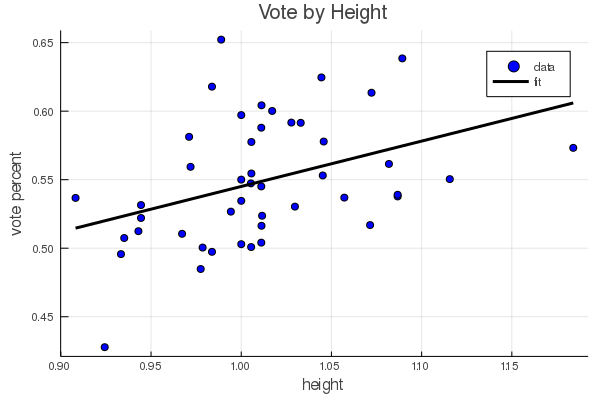

In [35]:
plot(h,v, st=:scatter, color=:blue, label = "data",xlabel="height", ylabel="vote percent", title = "Vote by Height")
plot!(h,yhat, color=:black, linewidth=3, label="fit")